### Importing lib:

In [1]:
import sys
import os

sys.path.append('../')

import neurobot

### Importing toy dataset from `sklearn.datasets.load_breast_cancer()`

In [2]:
from sklearn import datasets

data = datasets.load_breast_cancer()

###### Choose your X (train_data) and y (train_targets) as `pandas.DataFrame()` or  `numpy.array()`:

In [3]:
# X and y suppose to be either np.arrays or pd.DataFrames

X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

### Defining new object of Grid Cross Validation Linear class:

In [4]:
from neurobot.linear import linear_grid

C:\ProgramData\Anaconda3\envs\neurobot\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.from_model module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
import pandas as pd

In [6]:
temp_grid = linear_grid.GridCVLinear(X, y, classifiers=['lr', 'rfc'])

In [7]:
temp_grid.train()

Number of samples  569 

Number of features  30 

Target distribution: 
1    357
0    212
Name: 0, dtype: int64 

Training LR...
(training took 2.3586905002593994s)



[GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=42),
              estimator=Pipeline(steps=[('Fill_NaN',
                                         SimpleImputer(strategy='median')),
                                        ('StdScaler', StandardScaler()),
                                        ('oversampling',
                                         SMOTE(n_jobs=-1, random_state=42,
                                               sampling_strategy='minority')),
                                        ('dim_reduction',
                                         SelectKBest(score_func=<function ttest_ind at 0x000002A4A4117160>)),
                                        ('classifier',
                                         LogisticRegression(random_state=42,
                                                            solver='liblinear'))]),
              n_jobs=-1,
              param_grid={'classifier__C': [0.0001, 0.001, 0.01],
                          'c

,best parameters,best dim. reduction method,mean,std
classifier,,,,
LR,"classifier__C = 0.01, classifier__penalty = l2",SelectKBest(k='all'),0.993682,0.004659


<Figure size 576x216 with 0 Axes>

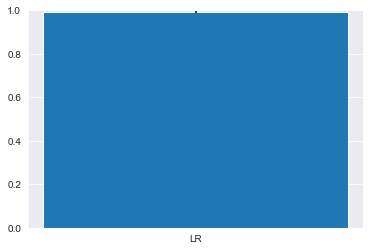

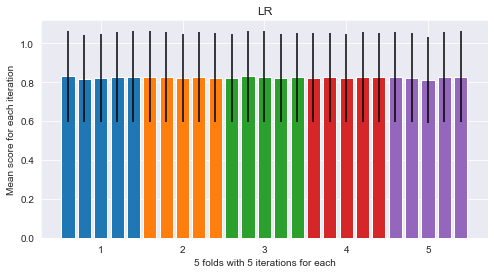

Best model: 
LR
classifier__C = 0.01
classifier__penalty = l2
dim_reduction = SelectKBest(k='all')


In [8]:
# observing function
temp_grid.print_results()

In [9]:
temp_grid.bootstrap_632()

test_classification
LR  acc: 97.19%  95% Confidence interval: [95.87, 98.48]  time 0.89


In [10]:
temp_grid.loo_cv()

# test_classification
# SVC:   acc 0.96  tpr 0.94  tnr 0.97  time 97.8
# LR:   acc 0.97  tpr 0.97  tnr 0.97  time 66.53
# RFC:   acc 0.96  tpr 0.95  tnr 0.96  time 410.69

test_classification
LR:   acc 0.97  tpr 0.97  tnr 0.97  time 6.75


Number of samples  569 

Number of features  30 

Target distribution: 
1    357
0    212
Name: 0, dtype: int64 

Training LR...
(training took 0.3929481506347656s)




,best parameters,best dim. reduction method,mean,std
classifier,,,,
LR,"classifier__C = 0.01, classifier__penalty = l2",SelectKBest(k='all'),0.993682,0.004659


<Figure size 576x216 with 0 Axes>

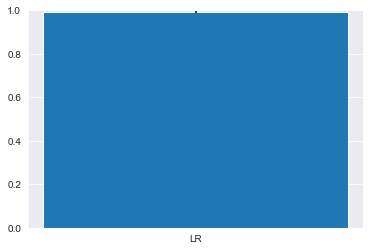

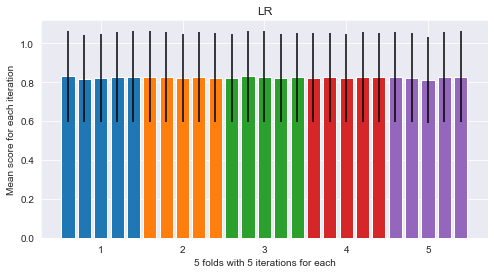

Best model: 
LR
classifier__C = 0.01
classifier__penalty = l2
dim_reduction = SelectKBest(k='all')

Bootstrap_632:
test_classification
LR  acc: 97.19%  95% Confidence interval: [95.87, 98.48]  time 0.88

Loo_cv:
test_classification
LR:   acc 0.97  tpr 0.97  tnr 0.97  time 7.02


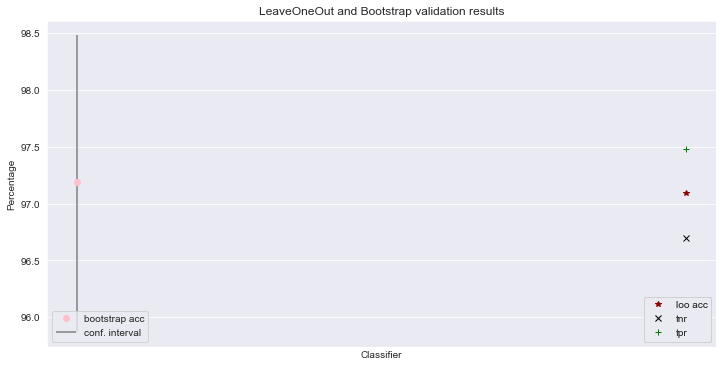

FileNotFoundError: [Errno 2] No such file or directory: 'results/cancer_grid_val_plot.png'

In [11]:
# function with validation, full pipeline
temp_grid.train_val(problem_name='cancer', 
                    fig_name='results/cancer_grid_val_plot')

//TODO 
0. почему у LR на фолдах такая дисперсия
1. check logging file
2. проверить импорты, не импортируем ли мы слишком много
3. исправить ворнинги
4. сделать отчет входного анализа
5. сделать входный выбор грида